<a href="https://colab.research.google.com/github/babuhinalex/babukhin-lab4prog/blob/master/hotel_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   Чаще всего бронируются отели в Европе 
2.   Чаще всего бронируют отели в городах 
3.   Чаще всего люди отдыхающщими с детьми выбирают загородные отели 
4.   Продолжительность проживания в отеле в городе больше, чем за городом
5.   В июле кажого года больше всего бронирований отелей 

# Work with DF

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
df_ = pd.read_csv('https://stepik.org/media/attachments/lesson/360344/bookings.csv', sep=';')

In [ ]:
df_.dtypes

Hotel                         object
Is Canceled                    int64
Lead Time                      int64
arrival full date             object
Arrival Date Year              int64
Arrival Date Month            object
Arrival Date Week Number       int64
Arrival Date Day of Month      int64
Stays in Weekend nights        int64
Stays in week nights           int64
stays total nights             int64
Adults                         int64
Children                     float64
Babies                         int64
Meal                          object
Country                       object
Reserved Room Type            object
Assigned room type            object
customer type                 object
Reservation Status            object
Reservation status_date       object
dtype: object

In [ ]:
df_.head(10)

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,FB,PRT,C,C,Transient,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015-07-01,2015,July,27,1,0,3,...,2,0.0,0,BB,PRT,A,A,Transient,Canceled,2015-05-06
9,Resort Hotel,1,75,2015-07-01,2015,July,27,1,0,3,...,2,0.0,0,HB,PRT,D,D,Transient,Canceled,2015-04-22


In [ ]:
df_.columns

Index(['Hotel', 'Is Canceled', 'Lead Time', 'arrival full date',
       'Arrival Date Year', 'Arrival Date Month', 'Arrival Date Week Number',
       'Arrival Date Day of Month', 'Stays in Weekend nights',
       'Stays in week nights', 'stays total nights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'Reserved Room Type', 'Assigned room type',
       'customer type', 'Reservation Status', 'Reservation status_date'],
      dtype='object')

In [ ]:
df_.columns = df_.columns.str.replace(' ', '_')
df_.columns = df_.columns.str.lower()

In [ ]:
df = df_[['hotel', 'stays_total_nights', 'adults', 'children', 'babies', 'country']]

In [ ]:
df.head(5)

,hotel,stays_total_nights,adults,children,babies,country
0,Resort Hotel,0,2,0.0,0,PRT
1,Resort Hotel,0,2,0.0,0,PRT
2,Resort Hotel,1,1,0.0,0,GBR
3,Resort Hotel,1,1,0.0,0,GBR
4,Resort Hotel,2,2,0.0,0,GBR


# 1: % of all reservation to Top-10 country 

In [ ]:
(df.country.value_counts().head(10) * 100 / df.shape[0]).sum().round(2)
# We can see that first 10 country countain 84.43% of all reservation
# That make us sure that our analising data is not evenly distributed, so we can do our perdiction only with these countries 

84.43

In [ ]:
(df.country.value_counts().head(10) * 100 / df.shape[0]).round(2)
# Top-10 country with their % from all number of reservation 

PRT    40.70
GBR    10.16
FRA     8.72
ESP     7.18
DEU     6.10
ITA     3.15
IRL     2.83
BEL     1.96
BRA     1.86
NLD     1.76
Name: country, dtype: float64

In [ ]:
df1 = pd.DataFrame(df.country.value_counts().head(10))
df1 = df1.rename(columns={'country' : 'count'})
df1['country'] = list(df1.index)
df1.index = list(range(10))
# Making new DF to make barplot 

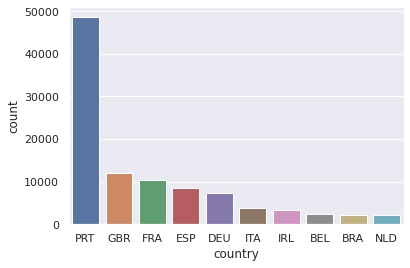

In [ ]:
sns.set_style("darkgrid")
sns.barplot(x='country' , y='count' , data=df1 )

# 2: Hotel

In [ ]:
df.hotel.value_counts() * 100 / df.shape[0]
# As we can see, 66.4 % of all reservation were 'City Hotel'

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

# 3: City or Resort

In [ ]:
df[['adults', 'children','babies']].head(3)

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0


In [ ]:
df[['adults', 'children', 'babies']].mean().idxmax()
# That means that most of the vivistors are 'adults'

'adults'

In [ ]:
df['total_kids'] = df['children'] + df['babies'] 
# join 'children' and 'babires' -> 'total_kids' 

<ipython-input-80-c5cebe9ab548>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_kids'] = df['children'] + df['babies']


In [ ]:
df.query('total_kids != 0').shape[0] * 100 / df.shape[0]
# Only 7.8 % of all guests have kids 

7.819750397855767

In [ ]:
df.groupby('hotel', as_index=False).agg({'total_kids' : 'sum'})
# As we can see, guests with kids prefer 'Resort Hotel', 

,hotel,total_kids
0,City Hotel,7640.0
1,Resort Hotel,5712.0


In [ ]:
df.groupby('hotel', as_index=False).agg({'total_kids' : 'mean'})
# В СРЕДНЕМ! Ну то есть, могут быть 99 без клиентов, а вот 100 с 9 детьми, и получаетсся, что 9 детей - на 100 клиентов - то, что показывает mean 

,hotel,total_kids
0,City Hotel,0.096311
1,Resort Hotel,0.142586


In [ ]:
persent = [df.query('total_kids != 0 and hotel == "City Hotel"').shape[0] * 100 /  df.query('hotel == "City Hotel"').shape[0], df.query('total_kids != 0 and hotel == "Resort Hotel"').shape[0] * 100 /  df.query('hotel == "Resort Hotel"').shape[0]]

In [ ]:
df_kids = df.groupby('hotel', as_index=False).agg({'total_kids' : 'sum'})
df_kids['persent_from_hotel'] = persent
df_kids['client'] = [df.query('hotel == "City Hotel"').shape[0], df.query('hotel == "Resort Hotel"').shape[0]] 
df_kids
# As we can see, guests with kids prefer 'Resort Hotel', 
# тут беру процент не от всех, а от конкретного отеля 
df_kids['persent_from_all'] = [df.query('total_kids != 0 and hotel == "City Hotel"').shape[0] * 100 /  df.shape[0], df.query('total_kids != 0 and hotel == "Resort Hotel"').shape[0] * 100 /  df.shape[0]]
df_kids

,hotel,total_kids,persent_from_hotel,client,persent_from_all
0,City Hotel,7640.0,6.815833,79330,4.528855
1,Resort Hotel,5712.0,9.807788,40060,3.290895


# 4: reservation duration


In [ ]:
df.groupby(['hotel'], as_index=False).agg({'stays_total_nights' : 'mean'}).round(2)
# duration of nights in 'Resort Hotel' is loner 

,hotel,stays_total_nights
0,City Hotel,2.98
1,Resort Hotel,4.32


# The distrubution of reservation on years and months


In [ ]:
df3 = df_.query('hotel == "City Hotel"').groupby(['arrival_date_year','arrival_date_month'], as_index=False).agg({'is_canceled' : 'count'})

In [ ]:
df3 = df3.rename(columns={'arrival_date_year':'year', 'arrival_date_month':'month','is_canceled':'canceled'})

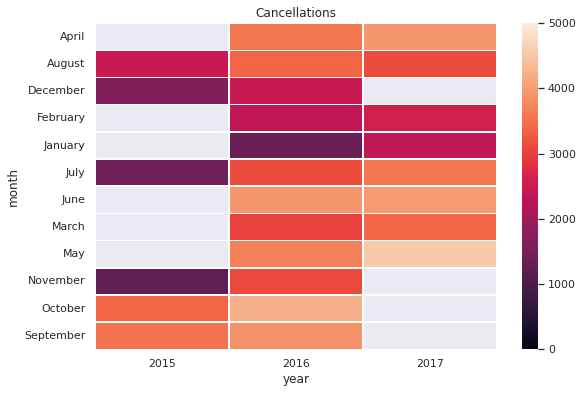

In [ ]:
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Cancellations')
sns.heatmap(df3.pivot("month", "year", "canceled"), linewidths=.5, vmin= 5000 , vmax=0)